# Info about Notebook authors etc

# Preprocess

In [1]:
import pandas as pd

df_bmha = pd.read_stata("/Users/barkatsikder/downloads/duflo/dataverse_files/baseline_menage_hhid_anl.dta")
df_brha = pd.read_stata("/Users/barkatsikder/downloads/duflo/dataverse_files/baseline_roster_hhid_anl.dta")

df_eaha = pd.read_stata("/Users/barkatsikder/downloads/duflo/dataverse_files/endline_ACD_hhid_anl.dta")
df_ebha = pd.read_stata("/Users/barkatsikder/downloads/duflo/dataverse_files/endline_BDEFKLM_hhid_anl.dta")

df_dpza = pd.read_stata("/Users/barkatsikder/downloads/duflo/dataverse_files/distances_price_zones_anl.dta")
df_gcar = pd.read_stata("/Users/barkatsikder/downloads/duflo/dataverse_files/groupe_connexion_anl_renamed.dta")

df_sa = pd.read_stata("/Users/barkatsikder/downloads/duflo/dataverse_files/spillovers_anl.dta")

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Outcomes

In [3]:
# encouragement, connected, interaction
treatment_info = df_gcar[["random_id", "treatment", "branche", "menage_supprime"]] #drop supprime=1

treatment_info = treatment_info[treatment_info["menage_supprime"] == '0 Household not dropped from sample']
treatment_info = treatment_info.drop(["menage_supprime"], axis=1)
len(treatment_info)

treatment_info["treatment"].value_counts()

1 Household in treatment group    434
0 Household in control group      411
Name: treatment, dtype: int64

In [4]:
informal_info = df_bmha[["random_id", "f12", "f14", "f15"]]
treat_informal = pd.merge(treatment_info, informal_info, on="random_id", how="left")
len(treat_informal)

treat_informal["informal"] = 0 # since only one or two stray answers
for i in range(len(treat_informal)):
    if treat_informal.loc[i,"f12"] == "1 = Yes" or treat_informal.loc[i,"f14"] == "1 = Yes" or treat_informal.loc[i,"f15"] == "1 = Yes":
        treat_informal.loc[i,"informal"] = 1

treat_informal = treat_informal.drop(["f12", "f14", "f15"], axis=1)  

#informal_info["f15"].value_counts(dropna=False)

In [5]:
distancetotap = df_dpza[["random_id", "bfmin"]] #min distance to public fountain
spillover = df_sa[["random_id", "n_sample20", "n_treated20", "n_connect20" ]]
dist_spill = pd.merge(distancetotap, spillover, on="random_id", how="inner")

In [6]:
data0 = pd.merge(treat_informal, dist_spill, on="random_id", how="inner")
data0

,random_id,treatment,branche,informal,bfmin,n_sample20,n_treated20,n_connect20
0,1,0 Household in control group,0 Household was not connected,1,0.014764,9.0,4.0,7.0
1,2,0 Household in control group,0 Household was not connected,0,0.058643,2.0,0.0,0.0
2,3,1 Household in treatment group,1 Household was connected,1,0.015530,1.0,1.0,1.0
3,5,0 Household in control group,0 Household was not connected,0,0.100201,1.0,0.0,1.0
4,7,1 Household in treatment group,1 Household was connected,0,0.036884,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...
840,1030,1 Household in treatment group,1 Household was connected,0,0.010634,1.0,1.0,1.0
841,1031,1 Household in treatment group,1 Household was connected,1,0.348615,1.0,0.0,0.0
842,1033,0 Household in control group,0 Household was not connected,1,0.197256,0.0,0.0,0.0
843,1034,0 Household in control group,0 Household was not connected,0,0.286594,0.0,0.0,0.0


In [7]:
data0["treatment"] = data0["treatment"].astype(str)
for i in range(len(data0)):        
    if data0.loc[i,"treatment"] == '0 Household in control group':
        data0.loc[i,"treatment"] = "0.0"
    if data0.loc[i,"treatment"] == '1 Household in treatment group':
        data0.loc[i,"treatment"] = "1.0"

data0["branche"] = data0["branche"].astype(str)
for i in range(len(data0)):        
    if data0.loc[i,"branche"] == '0 Household was not connected':
        data0.loc[i,"branche"] = "0.0"
    if data0.loc[i,"branche"] == '1 Household was connected':
        data0.loc[i,"branche"] = "1.0"
        
data0[["treatment", "branche"]] = data0[["treatment", "branche"]].astype(float)
data0

,random_id,treatment,branche,informal,bfmin,n_sample20,n_treated20,n_connect20
0,1,0.0,0.0,1,0.014764,9.0,4.0,7.0
1,2,0.0,0.0,0,0.058643,2.0,0.0,0.0
2,3,1.0,1.0,1,0.015530,1.0,1.0,1.0
3,5,0.0,0.0,0,0.100201,1.0,0.0,1.0
4,7,1.0,1.0,0,0.036884,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...
840,1030,1.0,1.0,0,0.010634,1.0,1.0,1.0
841,1031,1.0,1.0,1,0.348615,1.0,0.0,0.0
842,1033,0.0,0.0,1,0.197256,0.0,0.0,0.0
843,1034,0.0,0.0,0,0.286594,0.0,0.0,0.0


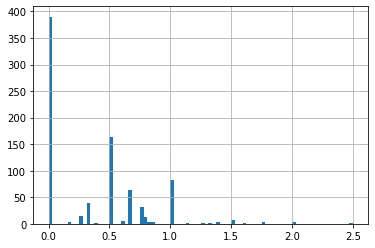

In [8]:
smoother = 1
data0["diffusion"] = (data0["n_connect20"]+data0["branche"]) / (data0["n_treated20"]+data0["treatment"]+smoother)
data0["diffusion"].value_counts()
hist = data0["diffusion"].hist(bins=80)

In [9]:
#fincosts = df_ebha[[ "random_id", "f60m4" ]]
#fincosts["f60m4"].value_counts(dropna=False)
#data1 = pd.merge(data0, fincosts, on="random_id", how="left")
# Financials are garbage since 700+ NaNs

tension = df_ebha[[ "random_id", "f020" ]]
data1 = pd.merge(data0, tension, on="random_id", how="left")

tension["f020"].value_counts(dropna=False)

2 = No                    691
1 = Yes                   100
NaN                         3
-97 = Response refused      2
-99 = Does not know         1
Name: f020, dtype: int64

In [10]:
tension = data1[[ "f020" ]].astype(str)

for i in range(len(tension)):        
    if tension.loc[i,"f020"] == '1 = Yes':
        tension.loc[i,"f020"] = "1"
    else:
        tension.loc[i,"f020"] = "0"
        
data1["tension"] = tension.astype(float)  

data1 = data1.drop([ "f020"], axis=1)

In [11]:
data1

,random_id,treatment,branche,informal,bfmin,n_sample20,n_treated20,n_connect20,diffusion,tension
0,1,0.0,0.0,1,0.014764,9.0,4.0,7.0,1.400000,1.0
1,2,0.0,0.0,0,0.058643,2.0,0.0,0.0,0.000000,0.0
2,3,1.0,1.0,1,0.015530,1.0,1.0,1.0,0.666667,0.0
3,5,0.0,0.0,0,0.100201,1.0,0.0,1.0,1.000000,0.0
4,7,1.0,1.0,0,0.036884,3.0,1.0,1.0,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...
840,1030,1.0,1.0,0,0.010634,1.0,1.0,1.0,0.666667,0.0
841,1031,1.0,1.0,1,0.348615,1.0,0.0,0.0,0.500000,0.0
842,1033,0.0,0.0,1,0.197256,0.0,0.0,0.0,0.000000,0.0
843,1034,0.0,0.0,0,0.286594,0.0,0.0,0.0,0.000000,1.0


In [12]:
# PCA stuff

## Covariates



In [13]:
from math import isnan

In [14]:
#IDs to keep

random_id = data1[["random_id"]]

In [15]:
child_health = df_brha[["random_id","d32"]]
child_health = pd.merge(random_id, child_health, on="random_id", how="left") 
#child_health = child_health.dropna()

child_health["d32"] = child_health["d32"].astype(float)
#child_health["d32"].value_counts(dropna=False)

child_health = child_health.groupby('random_id', as_index=False).mean()

child_health["d32"] = child_health["d32"].fillna( child_health["d32"].mean() )

child_health

,random_id,d32
0,1.0,10.000000
1,2.0,8.167839
2,3.0,8.750000
3,5.0,10.000000
4,7.0,8.000000
...,...,...
840,1030.0,10.000000
841,1031.0,10.000000
842,1033.0,8.167839
843,1034.0,8.167839


In [16]:
employment = df_brha[["random_id", "c1"]]
employment = pd.merge(random_id, employment, on="random_id", how="left") 

employment["c1"] = employment["c1"].astype(str)
#employment = (employment[ employment["c1"] != "4 = Inactive Person" ]).reset_index()

for i in range(len(employment)):
    if employment.loc[i,"c1"] == "1 = Employed":
        employment.loc[i,"c1"] = "1.0"
    elif employment.loc[i,"c1"] == '3 = Part-Time Worker':
        employment.loc[i,"c1"] = "1.0"
    elif employment.loc[i,"c1"] == "4 = Inactive Person":
        employment.loc[i,"c1"] = "nan"
    else:
        employment.loc[i,"c1"] = "0.0"
        
employment["c1"] = employment["c1"].astype(float)

employment = employment.groupby('random_id', as_index=False).mean() 
employment["c1"] = employment["c1"].fillna( employment["c1"].mean() )

#employment = employment.drop([ "index"], axis=1)
employment



,random_id,c1
0,1.0,0.500000
1,2.0,0.000000
2,3.0,0.600000
3,5.0,1.000000
4,7.0,1.000000
...,...,...
840,1030.0,0.500000
841,1031.0,0.666667
842,1033.0,0.500000
843,1034.0,1.000000


In [17]:
household_income = df_bmha[[ "random_id","b8" ]]
household_income = pd.merge(random_id, household_income, on="random_id", how="left") 

household_income["b8"] = household_income["b8"].astype(str)
household_income["b8"].value_counts(dropna=False)



4 = 1501 - 2000 dhs        154
3 = 1001 - 1500 dhs        131
2 = 501 - 1000 dhs         106
5 = 2001 - 2500 dhs         98
1 = Less than 500 dhs       82
-99 = Does not know         69
6 = 2501 - 3000 dhs         57
7 = 3001 - 3500 dhs         45
11 = More than 5000 dhs     35
8 = 3501 - 4000 dhs         29
9 = 4001 - 4500 dhs         13
-97 = Refused response      12
10 = 4501 - 5000 dhs         9
nan                          5
Name: b8, dtype: int64

In [18]:
for i in range(len(household_income)):
    if household_income.loc[i,"b8"] == '1 = Less than 500 dhs':
        household_income.loc[i,"b8"] = "1.0"
    elif household_income.loc[i,"b8"] == '2 = 501 - 1000 dhs':
        household_income.loc[i,"b8"] = "2.0"
    elif household_income.loc[i,"b8"] == '3 = 1001 - 1500 dhs':
        household_income.loc[i,"b8"] = "3.0"
    elif household_income.loc[i,"b8"] == '4 = 1501 - 2000 dhs':
        household_income.loc[i,"b8"] = "4.0"
    elif household_income.loc[i,"b8"] == '5 = 2001 - 2500 dhs':
        household_income.loc[i,"b8"] = "5.0"
    elif household_income.loc[i,"b8"] == '6 = 2501 - 3000 dhs':
        household_income.loc[i,"b8"] = "6.0"
    elif household_income.loc[i,"b8"] == '7 = 3001 - 3500 dhs':
        household_income.loc[i,"b8"] = "7.0"
    elif household_income.loc[i,"b8"] == '8 = 3501 - 4000 dhs':
        household_income.loc[i,"b8"] = "8.0"
    elif household_income.loc[i,"b8"] == '9 = 4001 - 4500 dhs':
        household_income.loc[i,"b8"] = "9.0"
    elif household_income.loc[i,"b8"] == '10 = 4501 - 5000 dhs':
        household_income.loc[i,"b8"] = "10.0"
    elif household_income.loc[i,"b8"] == '11 = More than 5000 dhs':
        household_income.loc[i,"b8"] = "11.0"
    
    #replace these with mean later
    elif household_income.loc[i,"b8"] == '-99 = Does not know':
        household_income.loc[i,"b8"] = "nan"
    elif household_income.loc[i,"b8"] == '-97 = Refused response':
        household_income.loc[i,"b8"] = "nan"
    #elif isnan(float(household_income.loc[i,"b8"])):
        #household_income.loc[i,"b8"] = "1.0"


household_income["b8"] = household_income["b8"].astype(float)
household_income["b8"] = household_income["b8"].fillna(household_income["b8"].mean())
household_income

,random_id,b8
0,1,3.00000
1,2,1.00000
2,3,4.00000
3,5,4.00000
4,7,6.00000
...,...,...
840,1030,4.31357
841,1031,4.00000
842,1033,6.00000
843,1034,2.00000


In [19]:
num_rooms = df_bmha[["random_id","b2"]]
num_rooms = pd.merge(random_id, num_rooms, on="random_id", how="left")

#num_rooms["b2"] = num_rooms["b2"].astype(str)
num_rooms["b2"] = num_rooms["b2"].astype(float)
num_rooms["b2"] = num_rooms["b2"].fillna(num_rooms["b2"].mean())

num_rooms["b2"].value_counts(dropna=False)
num_rooms

,random_id,b2
0,1,1.0
1,2,2.0
2,3,3.0
3,5,3.0
4,7,4.0
...,...,...
840,1030,3.0
841,1031,6.0
842,1033,4.0
843,1034,3.0


In [20]:
res_type = df_bmha[["random_id","b1"]]
res_type = pd.merge(random_id, res_type, on="random_id", how="left")

res_type["b1"] = res_type[["b1"]].astype(str)
for i in range(len(res_type)):
    if str(res_type.loc[i,"b1"])[0] == '1':
        res_type.loc[i,"b1"] = "1.0"
    elif res_type.loc[i,"b1"] == '2 = 2 Floors':
        res_type.loc[i,"b1"] = "2.0"
    elif res_type.loc[i,"b1"] == '3 = 3 Floors':
        res_type.loc[i,"b1"] = "3.0"
    elif res_type.loc[i,"b1"] == '4 = 4 Floors':
        res_type.loc[i,"b1"] = "4.0"
    elif res_type.loc[i,"b1"] == '5 = 5 Floors':
        res_type.loc[i,"b1"] = "5.0"
    #elif isnan(float(res_type.loc[i,"b1"])):
        #res_type.loc[i,"b1"] = "1.0"
        
res_type["b1"] = res_type[["b1"]].astype(float)
res_type["b1"] = res_type["b1"].fillna(res_type["b1"].mean())

res_type

,random_id,b1
0,1,3.0
1,2,1.0
2,3,4.0
3,5,2.0
4,7,1.0
...,...,...
840,1030,3.0
841,1031,2.0
842,1033,2.0
843,1034,1.0


In [21]:
has_small_children = df_bmha[["random_id","g24"]]
has_small_children = pd.merge(random_id, has_small_children, on="random_id", how="left")

has_small_children["g24"] = has_small_children["g24"].astype(str)

for i in range(len(has_small_children)):
    if has_small_children.loc[i,"g24"] == "1 = Yes":
        has_small_children.loc[i,"g24"] = "1.0"
    elif has_small_children.loc[i,"g24"] == "2 = No":
        has_small_children.loc[i,"g24"] = "2.0"

has_small_children["g24"] = has_small_children["g24"].astype(float)
has_small_children["g24"] = has_small_children["g24"].fillna(has_small_children["g24"].mean())

has_small_children["g24"].value_counts(dropna=False)
has_small_children

,random_id,g24
0,1,1.000000
1,2,2.000000
2,3,1.000000
3,5,2.000000
4,7,2.000000
...,...,...
840,1030,1.000000
841,1031,1.000000
842,1033,1.716312
843,1034,2.000000


In [22]:
baseline_health = df_bmha[["random_id","d30"]]
baseline_health = pd.merge(random_id, baseline_health, on="random_id", how="left")

baseline_health["d30"] = baseline_health["d30"].astype(str)

for i in range(len(baseline_health)):
    if baseline_health.loc[i,"d30"] == "-99 = Does not know" or baseline_health.loc[i,"d30"] == "-97 = Refused response":
        baseline_health.loc[i,"d30"] = "nan"

baseline_health["d30"] = baseline_health["d30"].astype(float)
baseline_health["d30"] = baseline_health["d30"].fillna(baseline_health["d30"].mean())

baseline_health


,random_id,d30
0,1,10.0
1,2,3.0
2,3,8.0
3,5,7.0
4,7,7.0
...,...,...
840,1030,10.0
841,1031,8.0
842,1033,10.0
843,1034,2.0


In [23]:
data2 = random_id.copy(deep=True)
data2["child_health"] = child_health["d32"]
data2["employment"] = employment["c1"]
data2["household_income"] = household_income["b8"]
data2["num_rooms"] = num_rooms["b2"]
data2["res_type"] = res_type["b1"]
data2["has_small_children"] = has_small_children["g24"]
data2["baseline_health"] = baseline_health["d30"]

data2

,random_id,child_health,employment,household_income,num_rooms,res_type,has_small_children,baseline_health
0,1,10.000000,0.500000,3.00000,1.0,3.0,1.000000,10.0
1,2,8.167839,0.000000,1.00000,2.0,1.0,2.000000,3.0
2,3,8.750000,0.600000,4.00000,3.0,4.0,1.000000,8.0
3,5,10.000000,1.000000,4.00000,3.0,2.0,2.000000,7.0
4,7,8.000000,1.000000,6.00000,4.0,1.0,2.000000,7.0
...,...,...,...,...,...,...,...,...
840,1030,10.000000,0.500000,4.31357,3.0,3.0,1.000000,10.0
841,1031,10.000000,0.666667,4.00000,6.0,2.0,1.000000,8.0
842,1033,8.167839,0.500000,6.00000,4.0,2.0,1.716312,10.0
843,1034,8.167839,1.000000,2.00000,3.0,1.0,2.000000,2.0


In [24]:
data3 = pd.merge(data1, data2, on="random_id", how="left")

data3

,random_id,treatment,branche,informal,bfmin,n_sample20,n_treated20,n_connect20,diffusion,tension,child_health,employment,household_income,num_rooms,res_type,has_small_children,baseline_health
0,1,0.0,0.0,1,0.014764,9.0,4.0,7.0,1.400000,1.0,10.000000,0.500000,3.00000,1.0,3.0,1.000000,10.0
1,2,0.0,0.0,0,0.058643,2.0,0.0,0.0,0.000000,0.0,8.167839,0.000000,1.00000,2.0,1.0,2.000000,3.0
2,3,1.0,1.0,1,0.015530,1.0,1.0,1.0,0.666667,0.0,8.750000,0.600000,4.00000,3.0,4.0,1.000000,8.0
3,5,0.0,0.0,0,0.100201,1.0,0.0,1.0,1.000000,0.0,10.000000,1.000000,4.00000,3.0,2.0,2.000000,7.0
4,7,1.0,1.0,0,0.036884,3.0,1.0,1.0,0.666667,0.0,8.000000,1.000000,6.00000,4.0,1.0,2.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1030,1.0,1.0,0,0.010634,1.0,1.0,1.0,0.666667,0.0,10.000000,0.500000,4.31357,3.0,3.0,1.000000,10.0
841,1031,1.0,1.0,1,0.348615,1.0,0.0,0.0,0.500000,0.0,10.000000,0.666667,4.00000,6.0,2.0,1.000000,8.0
842,1033,0.0,0.0,1,0.197256,0.0,0.0,0.0,0.000000,0.0,8.167839,0.500000,6.00000,4.0,2.0,1.716312,10.0
843,1034,0.0,0.0,0,0.286594,0.0,0.0,0.0,0.000000,1.0,8.167839,1.000000,2.00000,3.0,1.0,2.000000,2.0


In [25]:
#preprocess break
bla bla bla

SyntaxError: invalid syntax (<ipython-input-25-04087da6e4f1>, line 2)

# Experiments : tension

In [28]:
# pipeline tools for cross validation, tuning, and validation curves
from sklearn.model_selection import StratifiedKFold, GridSearchCV, validation_curve, cross_val_score, train_test_split

#ML algorithms
from sklearn import ensemble, datasets, svm, metrics, neighbors, utils

In [114]:
#1
from dowhy import CausalModel
from IPython.display import Image, display

#2
from sklearn.model_selection import train_test_split, KFold

#3
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV, LassoCV

#4
import shap
from econml.dml import CausalForestDML

#6
import matplotlib.pyplot as plt


#extras
from econml.dml import DML, LinearDML, CausalForestDML


from sklearn.linear_model import (Lasso, LassoCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet, MultiTaskElasticNetCV)

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

from econml.grf import CausalForest

from econml.cate_interpreter import SingleTreePolicyInterpreter, SingleTreeCateInterpreter

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [109]:
masterdata = data3


covariates = ["informal", "bfmin", "child_health", "employment", "household_income", 
              "num_rooms", "res_type", "has_small_children", "baseline_health"]#, "n_connect20" ] #10th covariate
covariatenames = ["informal connection", "min distance to public tap", "child health", "employment", "household income", 
              "number of rooms", "residence floor level", "has small children", "baseline health"]

X = masterdata[covariates]
Z = masterdata["treatment"]
T = masterdata["branche"]
Y = masterdata["tension"]



In [149]:
# split data into train and test sets 
train, test = train_test_split(masterdata, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)
# might have to scale rest

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 

W = None
X_train = train[covariates]
Z_train = train["treatment"]
T_train = train["branche"]
Y_train = train["tension"]

X_test = test[covariates]
Z_test = test["treatment"]
T_test = test["branche"]
Y_test = test["tension"]

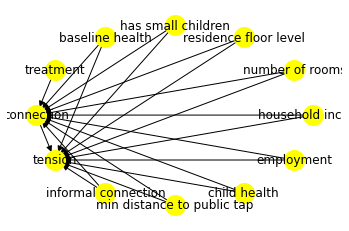

In [102]:
"1"

# set variables above

# build causal graph with dowhy - TODO maybe add instrument
model = CausalModel(
    data=masterdata,
    treatment="connection", 
    outcome="tension", 
    common_causes=covariatenames, 
    instruments="treatment", 
    effect_modifiers=None)
model.view_model()
#display(Image(filename="causal_model.png"))



# Connection on treatment

In [82]:
#might have to append to get comparable results

reg1 = smf.ols('branche ~ treatment + informal + bfmin+child_health+employment+household_income+num_rooms+res_type+has_small_children+baseline_health', data=masterdata).fit(cov_type='HC1', use_t=True)
print(reg1.summary())              


                            OLS Regression Results                            
Dep. Variable:                branche   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     69.96
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.74e-103
Time:                        01:26:33   Log-Likelihood:                -386.83
No. Observations:                 845   AIC:                             795.7
Df Residuals:                     834   BIC:                             847.8
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0434      0

In [150]:
# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het',
                                n_estimators=1000,       
                                min_samples_leaf=10,  
                                max_samples=0.5,
                                max_depth=None, 
                                discrete_treatment=True,
                                honest=True,
                                inference=True,
                                #model_y=LogisticRegressionCV(),
                                #model_t=LogisticRegressionCV(),
                                random_state=42)
                      

# connect on treat
#hyp =  [{"n_estimators": [100, 1000, 10000],
#        "min_samples_leaf": [5,10], 
#        "max_samples": [0.1, 0.2, 0.45] }]



#causal_forest.fit(Y=T, T=Z, X=X)
causal_forest.fit(Y=T_train, T=Z_train, X=X_train)

# estimate the CATE with the test set 
print(causal_forest.const_marginal_ate(X_test))
causal_forest.ate__inference().summary_frame()


[0.57149996]


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
X,,,,,,
ATE,0.576,0.03,19.061,0.0,0.527,0.626


In [135]:
#causal_forest.const_marginal_ate_inference(X_test).summary_frame()
#causal_forest.ate(X_test)

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


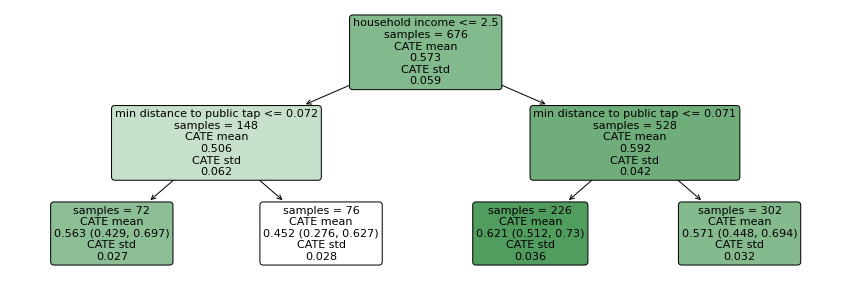

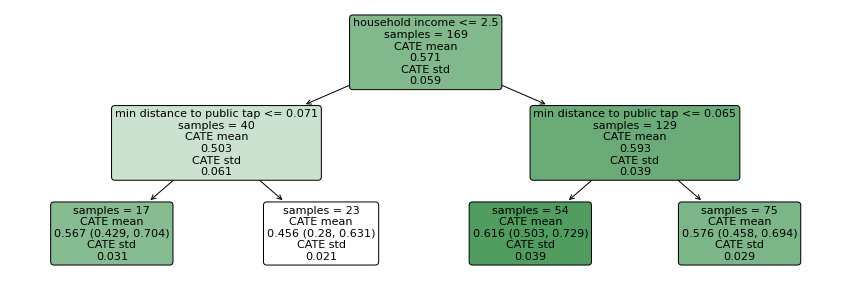

In [151]:
# tree stuff
from econml.cate_interpreter import SingleTreeCateInterpreter

intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, uncertainty_level = 0.05, max_depth=2)
intrp2 = SingleTreeCateInterpreter(include_model_uncertainty=True, uncertainty_level = 0.05, max_depth=2)

intrp.interpret(causal_forest, X_train)
intrp2.interpret(causal_forest, X_test)

plt.figure(figsize=(15, 5))
intrp.plot(feature_names=covariatenames) #make new list of proper covariate names
plt.show()
plt.figure(figsize=(15, 5))
intrp2.plot(feature_names=covariatenames)
plt.show()

In [ ]:
#interaction



Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


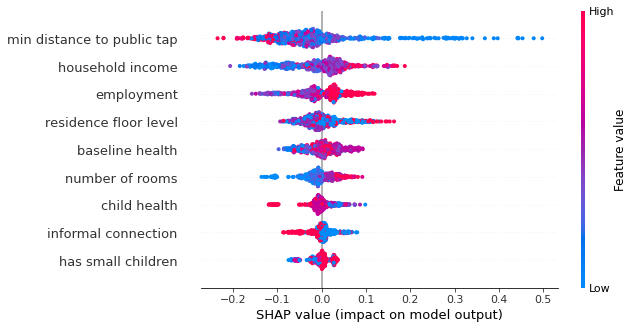

In [152]:
"4"

# fit causal forest with default parameters 
causal_forest2 = CausalForestDML()
causal_forest2.fit(Y=T_train, T=Z_train, X=X_train)

# calculate shap values of causal forest model 
shap_values = causal_forest2.shap_values(X_train)
# plot shap values 
shap.summary_plot(shap_values['Y0']['T0'], feature_names=covariatenames)

# TENSION on CONNECT

In [153]:
#might have to append to get comparable results

reg1 = smf.ols('tension ~ branche + informal + bfmin+child_health+employment+household_income+num_rooms+res_type+has_small_children+baseline_health', data=masterdata).fit(cov_type='HC1', use_t=True)
print(reg1.summary())              


                            OLS Regression Results                            
Dep. Variable:                tension   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     7.184
Date:                Mon, 17 May 2021   Prob (F-statistic):           6.21e-11
Time:                        17:25:39   Log-Likelihood:                -211.01
No. Observations:                 845   AIC:                             444.0
Df Residuals:                     834   BIC:                             496.2
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2570      0

In [154]:
# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het',
                                n_estimators=1000,       
                                min_samples_leaf=10,  
                                max_samples=0.5,
                                max_depth=None, 
                                discrete_treatment=True,
                                honest=True,
                                inference=True,
                                #model_y=LogisticRegressionCV(),
                                #model_t=LogisticRegressionCV(),
                                random_state=42)
                      

# connect on treat
#hyp =  [{"n_estimators": [100, 1000, 10000],
#        "min_samples_leaf": [5,10], 
#        "max_samples": [0.1, 0.2, 0.45] }]



#causal_forest.fit(Y=T, T=Z, X=X)
causal_forest.fit(Y=Y_train, T=T_train, X=X_train)

# estimate the CATE with the test set 
print(causal_forest.const_marginal_ate(X_test))
causal_forest.ate__inference().summary_frame()


[-0.15293606]


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
X,,,,,,
ATE,-0.151,0.022,-6.922,0.0,-0.187,-0.115


In [135]:
#causal_forest.const_marginal_ate_inference(X_test).summary_frame()
#causal_forest.ate(X_test)

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


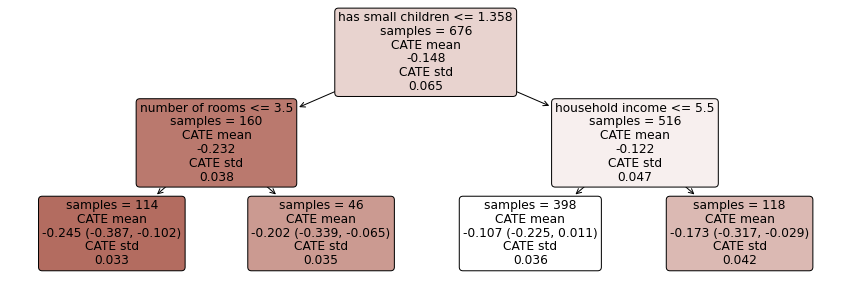

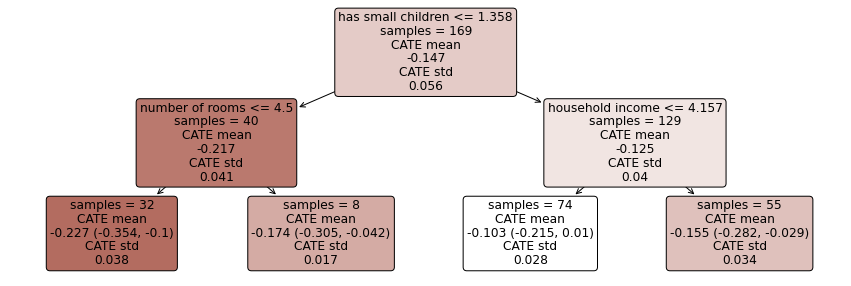

In [166]:
# tree stuff
from econml.cate_interpreter import SingleTreeCateInterpreter

intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, uncertainty_level = 0.05, max_depth=2)
intrp2 = SingleTreeCateInterpreter(include_model_uncertainty=True, uncertainty_level = 0.05, max_depth=2)

intrp.interpret(causal_forest2, X_train)
intrp2.interpret(causal_forest2, X_test)

plt.figure(figsize=(15, 5))
intrp.plot(feature_names=covariatenames) #make new list of proper covariate names
plt.show()
plt.figure(figsize=(15, 5))
intrp2.plot(feature_names=covariatenames)
plt.show()

In [ ]:
#interaction



Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


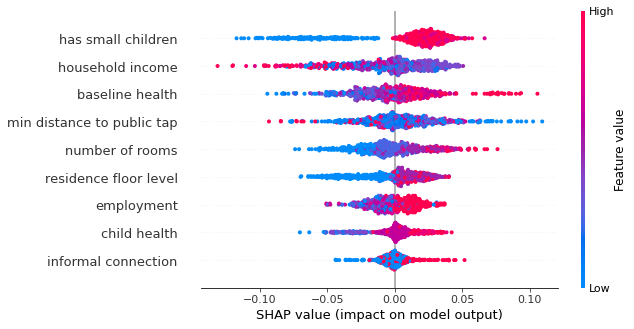

In [165]:
"4"

# fit causal forest with default parameters 
causal_forest2 = CausalForestDML()
causal_forest2.fit(Y=Y_train, T=T_train, X=X_train)

# calculate shap values of causal forest model 
shap_values = causal_forest2.shap_values(X_train)
# plot shap values 
shap.summary_plot(shap_values['Y0']['T0'], feature_names=covariatenames)